# PROBLEM STATEMENT:
To Analyze if the is effect on Pain score based on duration of procedure for different age ranges.
And effect on BP and heart rate due to procedure and given indication score
(# Outliers,Missing data,Anamolous data (if any) just flag
Univariate analysis,Bivariate Analysis(label all graphs))

# Reading The Dataset(ET-L)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Effect of drug on pain.csv')
df.head()

,Age,Group,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Performed by,Pain Score,Add analgesia
0,55,A,1,2.0,68.0,67,145,140,RESIDENT,0,No
1,38,A,1,6.0,72.0,70,139,140,RESIDENT,3,No
2,80,A,1,10.0,66.0,65,128,130,RESIDENT,2,No
3,27,A,3,4.0,82.0,80,140,138,RESIDENT,4,No
4,35,A,3,6.0,72.0,70,135,138,RESIDENT,4,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    75 non-null     int64  
 1   Group                  75 non-null     object 
 2   Indication             75 non-null     int64  
 3   Duration               75 non-null     float64
 4   Pulse pre procedure    67 non-null     float64
 5   Pulse post procedure   75 non-null     int64  
 6   Sys BP pre procedure   75 non-null     int64  
 7   Sys BP Post procedure  75 non-null     int64  
 8   Performed by           75 non-null     object 
 9   Pain Score             75 non-null     int64  
 10  Add analgesia          75 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 6.6+ KB


# Summary Statistics

In [5]:
df.describe(include='all')

,Age,Group,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Performed by,Pain Score,Add analgesia
count,75.000000,75,75.000000,75.000000,67.000000,75.00000,75.000000,75.000000,75,75.000000,75
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENT,NaN,No
freq,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,75
mean,47.893333,NaN,2.373333,5.382667,71.955224,74.28000,126.106667,125.000000,NaN,3.626667,NaN
std,14.930083,NaN,0.731037,2.013292,6.880876,6.35984,10.599048,10.140899,NaN,1.929664,NaN
min,18.000000,NaN,1.000000,2.000000,61.000000,64.00000,110.000000,110.000000,NaN,0.000000,NaN
25%,36.000000,NaN,2.000000,4.000000,66.000000,69.50000,119.000000,115.000000,NaN,3.000000,NaN
50%,49.000000,NaN,3.000000,5.000000,70.000000,75.00000,123.000000,120.000000,NaN,4.000000,NaN
75%,60.500000,NaN,3.000000,6.000000,77.000000,80.00000,136.500000,135.000000,NaN,5.000000,NaN


In [6]:
df['Indication'].value_counts()

3    39
2    25
1    11
Name: Indication, dtype: int64

In [7]:
df['Performed by'].value_counts()

RESIDENT      71
CONSULTANT     4
Name: Performed by, dtype: int64

# Missing Values

In [8]:
df.isnull().sum()

Age                      0
Group                    0
Indication               0
Duration                 0
Pulse pre procedure      8
Pulse post procedure     0
Sys BP pre procedure     0
Sys BP Post procedure    0
Performed by             0
Pain Score               0
Add analgesia            0
dtype: int64

In [9]:
df= df.drop(['Add analgesia'],axis=1)

In [10]:
df.shape

(75, 10)

# Interpolate the missing values in Pulse pre procedure

In [11]:
missing_pulse_pre=[]
for i in range(df.shape[0]):
    if pd.isnull(df['Pulse pre procedure'].iloc[i]):
        missing_pulse_pre.append(i)


In [12]:
missing_pulse_pre

[6, 13, 18, 19, 28, 29, 43, 59]

In [13]:
for x in missing_pulse_pre:
    print(df.iloc[x-1:x+1])

   Age Group  Indication  Duration  Pulse pre procedure  Pulse post procedure  \
5   44     A           3       7.0                 77.0                    76   
6   50     A           3       2.5                  NaN                    70   

   Sys BP pre procedure  Sys BP Post procedure Performed by  Pain Score  
5                   116                    120     RESIDENT           2  
6                   118                    120     RESIDENT           4  
    Age Group  Indication  Duration  Pulse pre procedure  \
12   78     A           3       4.2                 68.0   
13   69     A           3       7.0                  NaN   

    Pulse post procedure  Sys BP pre procedure  Sys BP Post procedure  \
12                    68                   130                    135   
13                    70                   119                    120   

   Performed by  Pain Score  
12     RESIDENT           3  
13     RESIDENT           0  
    Age Group  Indication  Duration  Pulse 

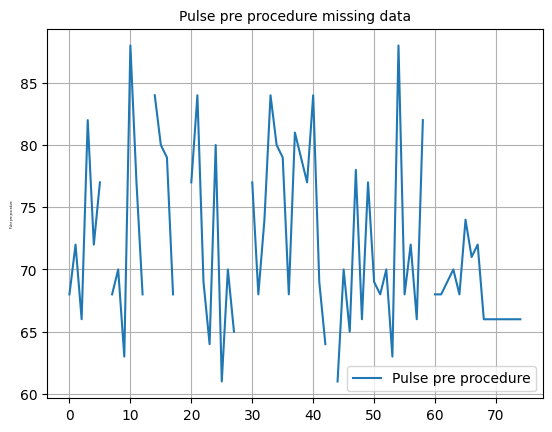

In [14]:
#plot for Original Pre Pulse Procedure Column
df.plot(y='Pulse pre procedure', use_index=True) #uses index values in x axis
plt.title("Pulse pre procedure missing data",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [15]:
df['Pulse pre_cleaned_poly']=df['Pulse pre procedure'].interpolate(method='polynomial', order=2)

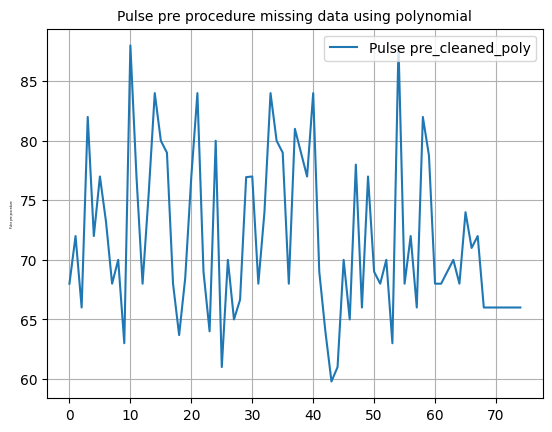

In [16]:
df.plot(y='Pulse pre_cleaned_poly', use_index=True)
plt.title("Pulse pre procedure missing data using polynomial",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [17]:
df['Pulse pre_cleaned_poly'].isnull().sum()

0

In [18]:
df['Pulse pre_cleaned_poly'].fillna(method='ffill', inplace=True)

In [19]:
df['Pulse pre_cleaned_poly'].isnull().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     75 non-null     int64  
 1   Group                   75 non-null     object 
 2   Indication              75 non-null     int64  
 3   Duration                75 non-null     float64
 4   Pulse pre procedure     67 non-null     float64
 5   Pulse post procedure    75 non-null     int64  
 6   Sys BP pre procedure    75 non-null     int64  
 7   Sys BP Post procedure   75 non-null     int64  
 8   Performed by            75 non-null     object 
 9   Pain Score              75 non-null     int64  
 10  Pulse pre_cleaned_poly  75 non-null     float64
dtypes: float64(3), int64(6), object(2)
memory usage: 6.6+ KB


In [21]:
df_1=df.drop(['Pulse pre procedure'],axis=1)

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     75 non-null     int64  
 1   Group                   75 non-null     object 
 2   Indication              75 non-null     int64  
 3   Duration                75 non-null     float64
 4   Pulse post procedure    75 non-null     int64  
 5   Sys BP pre procedure    75 non-null     int64  
 6   Sys BP Post procedure   75 non-null     int64  
 7   Performed by            75 non-null     object 
 8   Pain Score              75 non-null     int64  
 9   Pulse pre_cleaned_poly  75 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 6.0+ KB


# Univariate Analysis:Countplot

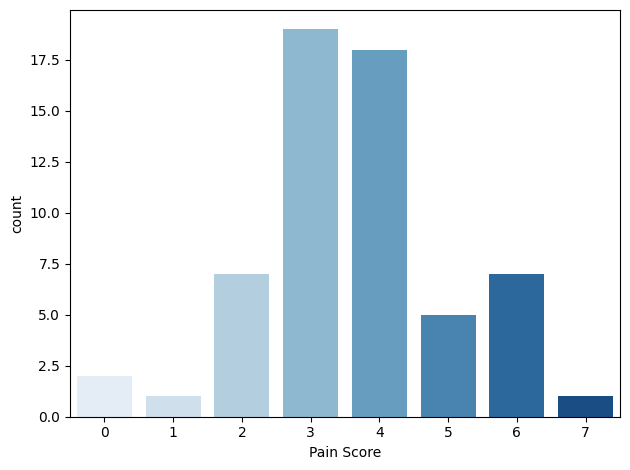

In [ ]:
sns.countplot(x='Pain Score',data=df_1,palette='Blues')
plt.tight_layout()
plt.show()

# BoxPlot

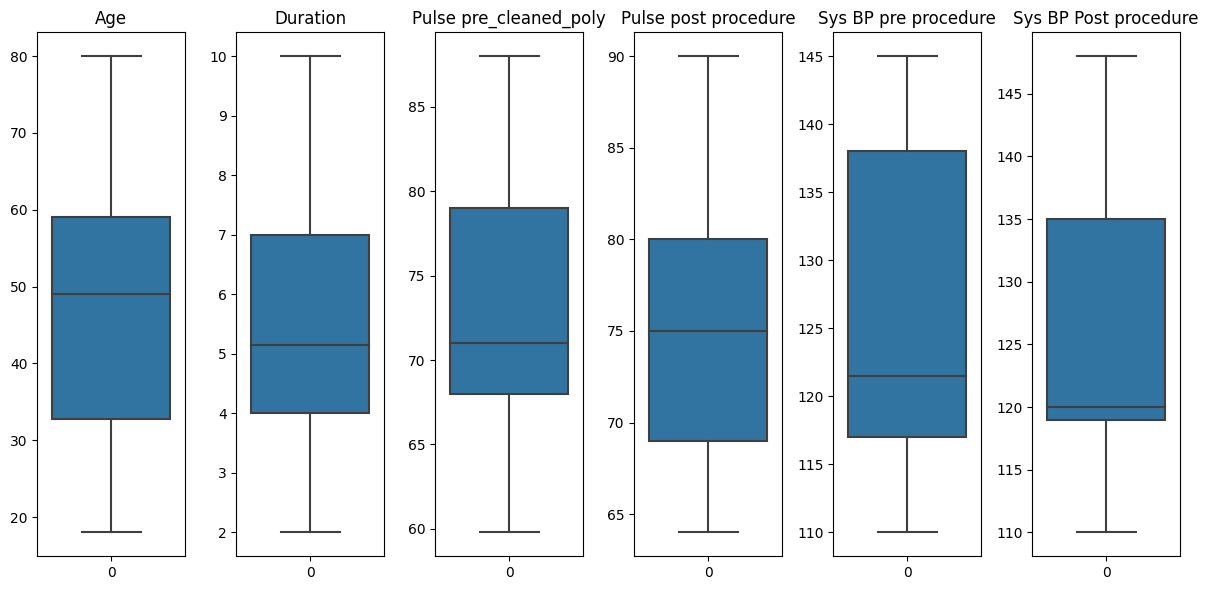

In [ ]:
columns_to_plot=['Age','Duration','Pulse pre_cleaned_poly','Pulse post procedure','Sys BP pre procedure','Sys BP Post procedure']
fig ,axes = plt.subplots(ncols=len(columns_to_plot),figsize=(12,6))
for col,axis in zip(columns_to_plot,axes):
  sns.boxplot(data=df_1[col],ax=axis)
  axis.set_title(col)
  #fig.suptitle(col)
plt.tight_layout()
plt.show()

# Correlation:heatmap

In [ ]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Pain Score,Pulse pre_cleaned_poly
Age,1.000000,-0.186769,0.233279,-0.049066,-0.115362,0.112634,0.149379,-0.123256,0.022924
Indication,-0.186769,1.000000,-0.024348,0.158994,0.134341,-0.299803,-0.426315,0.187296,0.113374
Duration,0.233279,-0.024348,1.000000,0.002424,-0.080703,-0.105513,0.019512,0.210598,0.079652
Pulse pre procedure,-0.049066,0.158994,0.002424,1.000000,0.853720,-0.011176,0.047418,-0.074631,1.000000
Pulse post procedure,-0.115362,0.134341,-0.080703,0.853720,1.000000,-0.016609,-0.106177,0.088671,0.697971
Sys BP pre procedure,0.112634,-0.299803,-0.105513,-0.011176,-0.016609,1.000000,0.466595,-0.035497,-0.023478
Sys BP Post procedure,0.149379,-0.426315,0.019512,0.047418,-0.106177,0.466595,1.000000,-0.091931,0.105998
Pain Score,-0.123256,0.187296,0.210598,-0.074631,0.088671,-0.035497,-0.091931,1.000000,-0.035542
Pulse pre_cleaned_poly,0.022924,0.113374,0.079652,1.000000,0.697971,-0.023478,0.105998,-0.035542,1.000000


<ipython-input-26-5f69ad872464>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(),annot=True,yticklabels=True,cbar=True,cmap='coolwarm')


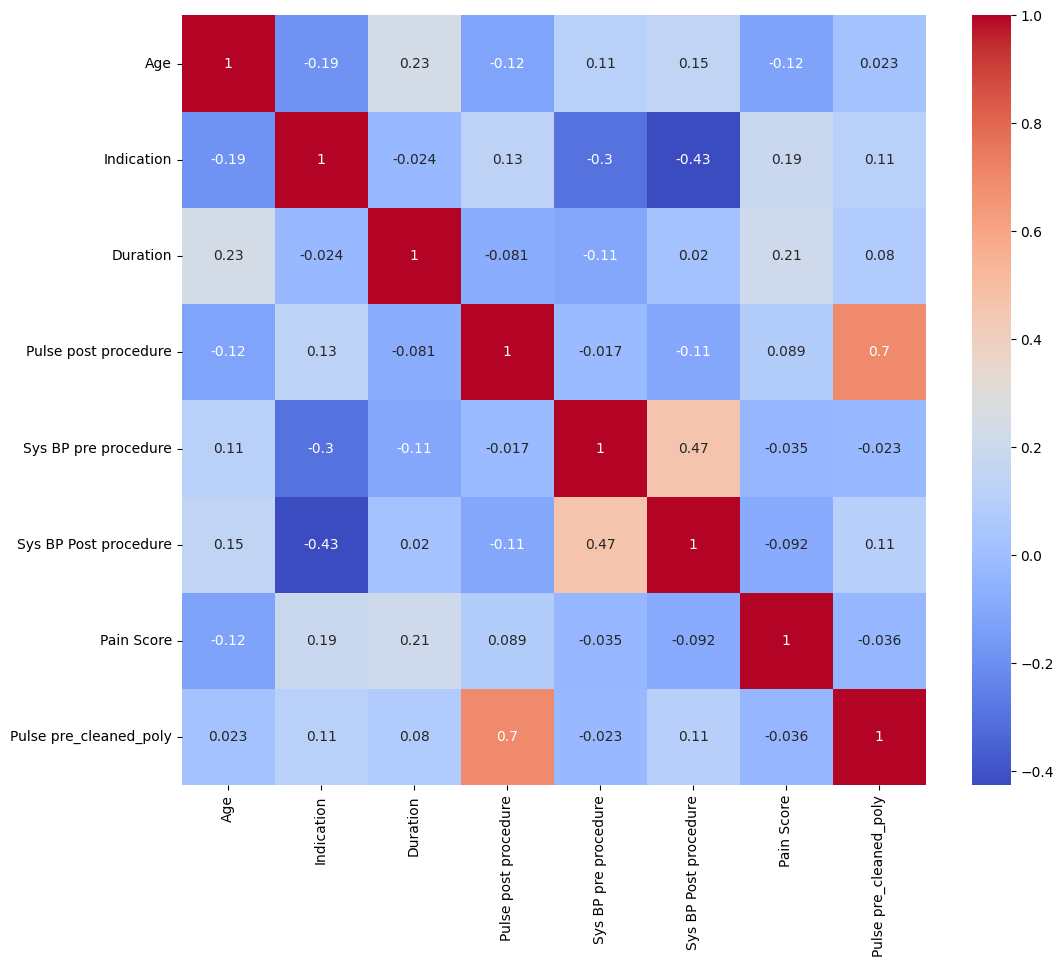

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_1.corr(),annot=True,yticklabels=True,cbar=True,cmap='coolwarm')
plt.show()

# Bivariate Analysis:Pain Score vs Other features(Countplot)
  

In [18]:
df_1.columns

Index(['Age', 'Group', 'Indication', 'Duration', 'Pulse post procedure',
       'Sys BP pre procedure', 'Sys BP Post procedure', 'Performed by',
       'Pain Score', 'Pulse pre_cleaned_poly'],
      dtype='object')

In [19]:
conditions1=  [
              (df_1['Age']>=18)&(df_1['Age']<=30),
              (df_1['Age']>30)&(df_1['Age']<=40),
              (df_1['Age']>40)&(df_1['Age']<=50),
              (df_1['Age']>50)&(df_1['Age']<=60),
              (df_1['Age']>60)&(df_1['Age']<=70),
              (df_1['Age']>70)&(df_1['Age']<=80)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['18-30','30-40','40-50','50-60','60-70','70-80']  #,'70-80','80+']

df_1['AgeRange']=np.select(conditions1,values)

conditions2=  [
              (df_1['Duration']>=2)&(df_1['Duration']<=3),
              (df_1['Duration']>3)&(df_1['Duration']<=4),
              (df_1['Duration']>4)&(df_1['Duration']<=5),
              (df_1['Duration']>5)&(df_1['Duration']<=6),
              (df_1['Duration']>6)&(df_1['Duration']<=7),
              (df_1['Duration']>7)&(df_1['Duration']<=8),
              (df_1['Duration']>8)&(df_1['Duration']<=9),
              (df_1['Duration']>9)&(df_1['Duration']<=10)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10']  #,'70-80','80+']

df_1['DurationRange']=np.select(conditions2,values)

conditions3=  [
              (df_1['Pulse post procedure']<=65),
              (df_1['Pulse post procedure']>65)&(df_1['Pulse post procedure']<=70),
              (df_1['Pulse post procedure']>70)&(df_1['Pulse post procedure']<=75),
              (df_1['Pulse post procedure']>75)&(df_1['Pulse post procedure']<=80),
              (df_1['Pulse post procedure']>80)&(df_1['Pulse post procedure']<=85),
              (df_1['Pulse post procedure']>85)&(df_1['Pulse post procedure']<=90)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['less than 65','66-70','71-75','76-80','81-85','86-90']  #,'70-80','80+']

df_1['Post_Pulse_Range'] = np.select(conditions3,values)

conditions4=  [
              (df_1['Sys BP pre procedure']>=110)&(df_1['Sys BP pre procedure']<=120),
              (df_1['Sys BP pre procedure']>120)&(df_1['Sys BP pre procedure']<=130),
              (df_1['Sys BP pre procedure']>130)&(df_1['Sys BP pre procedure']<=140),
              (df_1['Sys BP pre procedure']>140)&(df_1['Sys BP pre procedure']<=150)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['110-120','121-130','131-140','141-150']  #,'70-80','80+']

df_1['Pre_BP_Range']=np.select(conditions4,values)

conditions5=  [
              (df_1['Sys BP Post procedure']>=110)&(df_1['Sys BP Post procedure']<=120),
              (df_1['Sys BP Post procedure']>120)&(df_1['Sys BP Post procedure']<=130),
              (df_1['Sys BP Post procedure']>130)&(df_1['Sys BP Post procedure']<=140),
              (df_1['Sys BP Post procedure']>140)&(df_1['Sys BP Post procedure']<=150)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['110-120','121-130','131-140','141-150']  #,'70-80','80+']

df_1['Post_BP_Range']=np.select(conditions5,values)

conditions6=  [
              (df_1['Pulse pre_cleaned_poly']<=65),
              (df_1['Pulse pre_cleaned_poly']>65)&(df_1['Pulse pre_cleaned_poly']<=70),
              (df_1['Pulse pre_cleaned_poly']>70)&(df_1['Pulse pre_cleaned_poly']<=75),
              (df_1['Pulse pre_cleaned_poly']>75)&(df_1['Pulse pre_cleaned_poly']<=80),
              (df_1['Pulse pre_cleaned_poly']>80)&(df_1['Pulse pre_cleaned_poly']<=85),
              (df_1['Pulse pre_cleaned_poly']>85)&(df_1['Pulse pre_cleaned_poly']<=90)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['less than 65','66-70','71-75','76-80','81-85','86-90']  #,'70-80','80+']

df_1['PrePulseRange']=np.select(conditions6,values)


In [20]:
#df_1.drop(['Age','Duration'])
df_1.columns

Index(['Age', 'Group', 'Indication', 'Duration', 'Pulse post procedure',
       'Sys BP pre procedure', 'Sys BP Post procedure', 'Performed by',
       'Pain Score', 'Pulse pre_cleaned_poly', 'AgeRange', 'DurationRange',
       'Post_Pulse_Range', 'Pre_BP_Range', 'Post_BP_Range', 'PrePulseRange'],
      dtype='object')

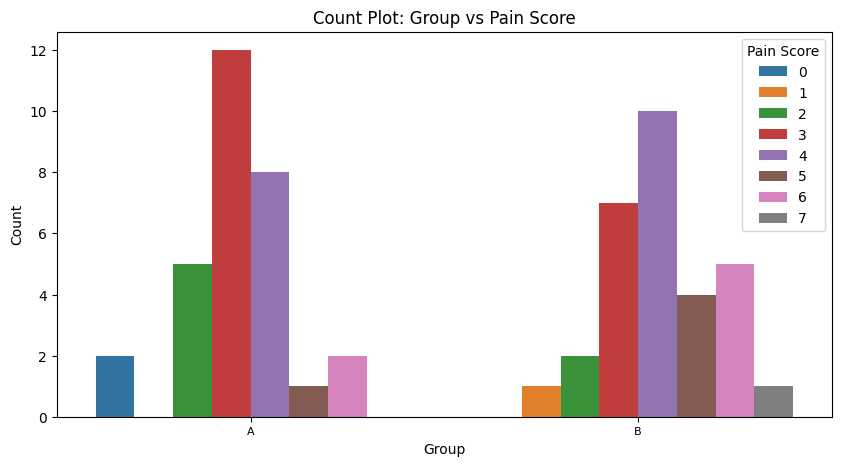

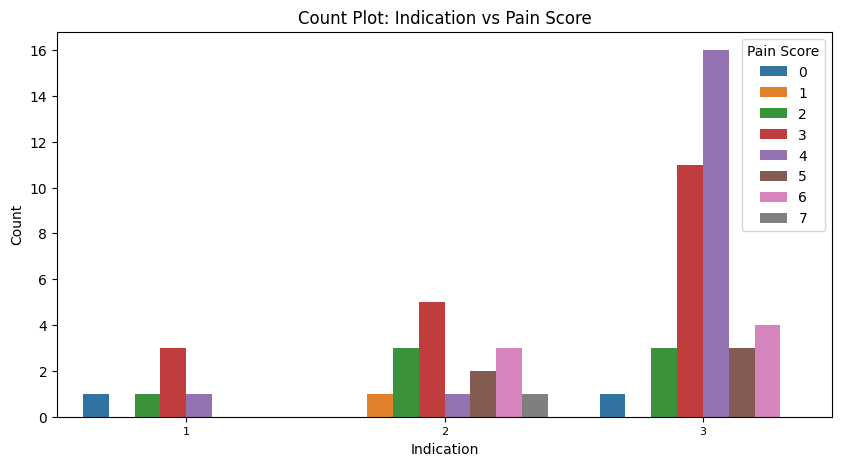

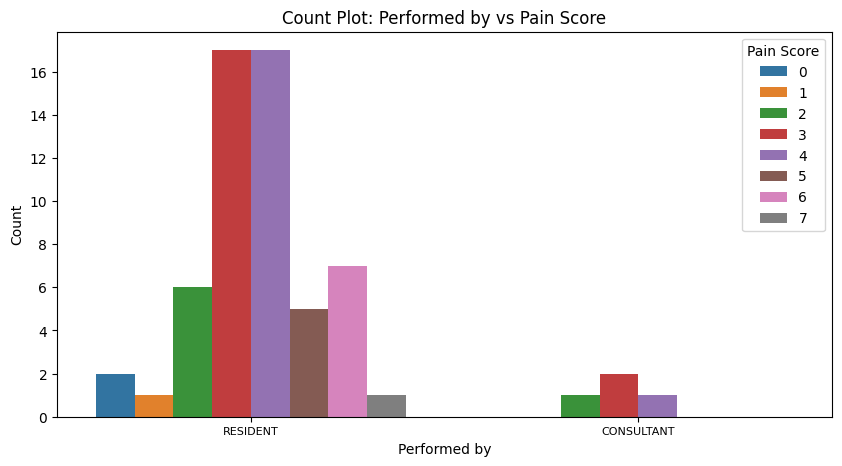

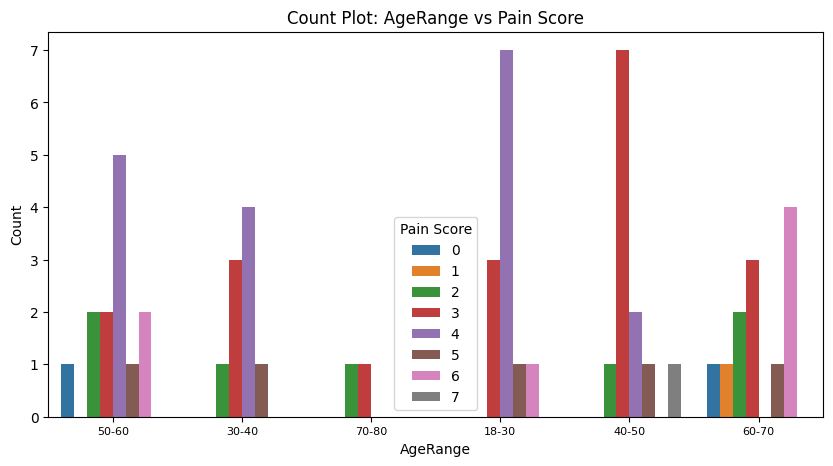

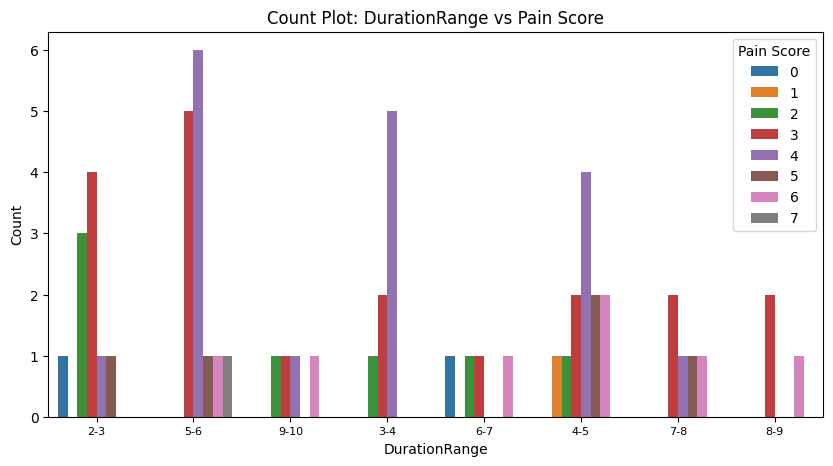

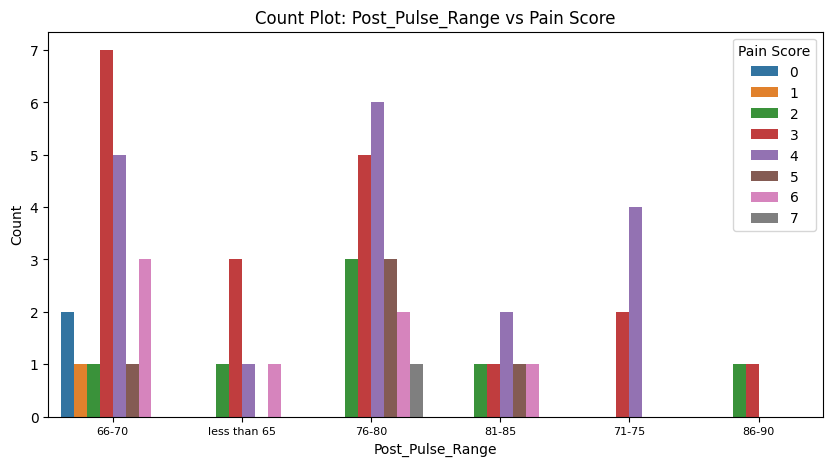

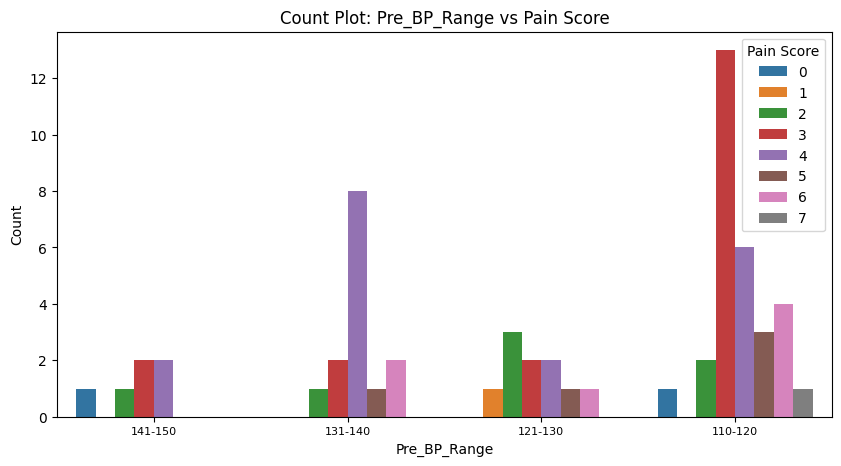

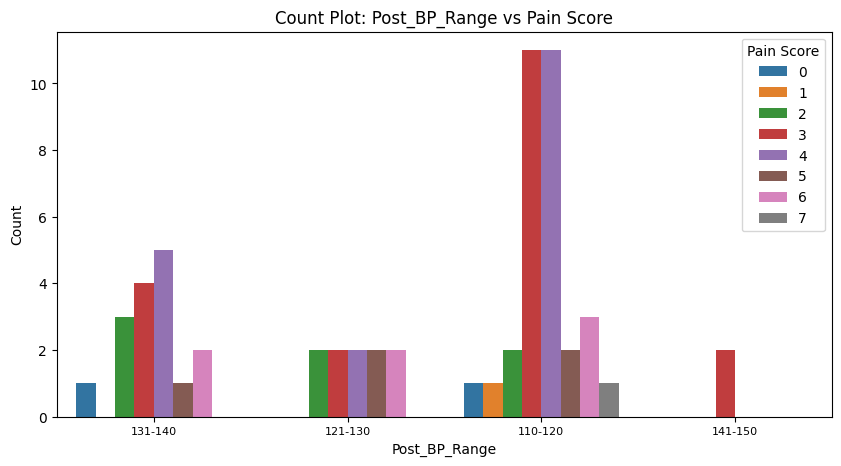

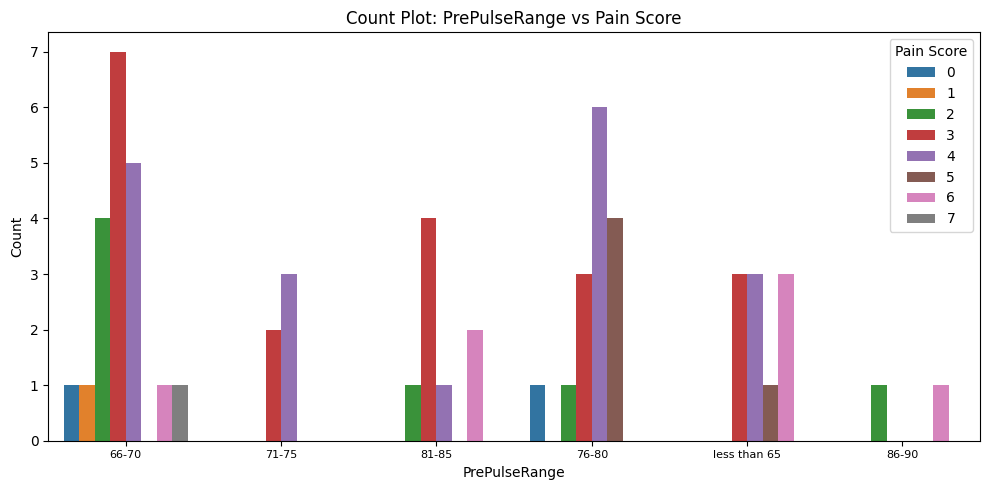

In [21]:
df_2=df_1.drop(['Age','Duration','Pulse post procedure','Sys BP pre procedure', 'Sys BP Post procedure','Pulse pre_cleaned_poly'],axis=1)
target_variable = 'Pain Score'
independent_variables = [col for col in df_2.columns if col != target_variable]
for i in independent_variables:
  fig,axarr=plt.subplots(figsize=(10,5))
  sns.countplot(data=df_2, x=i, hue=target_variable,ax=axarr)
  #sns.barplot(x=i,y=target_variable,data=df_1)
  plt.title(f'Count Plot: {i} vs {target_variable}')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.xticks(size=8)
plt.tight_layout()
plt.show()

# BarPlot: Comparison of Pre and post procedure Pulse

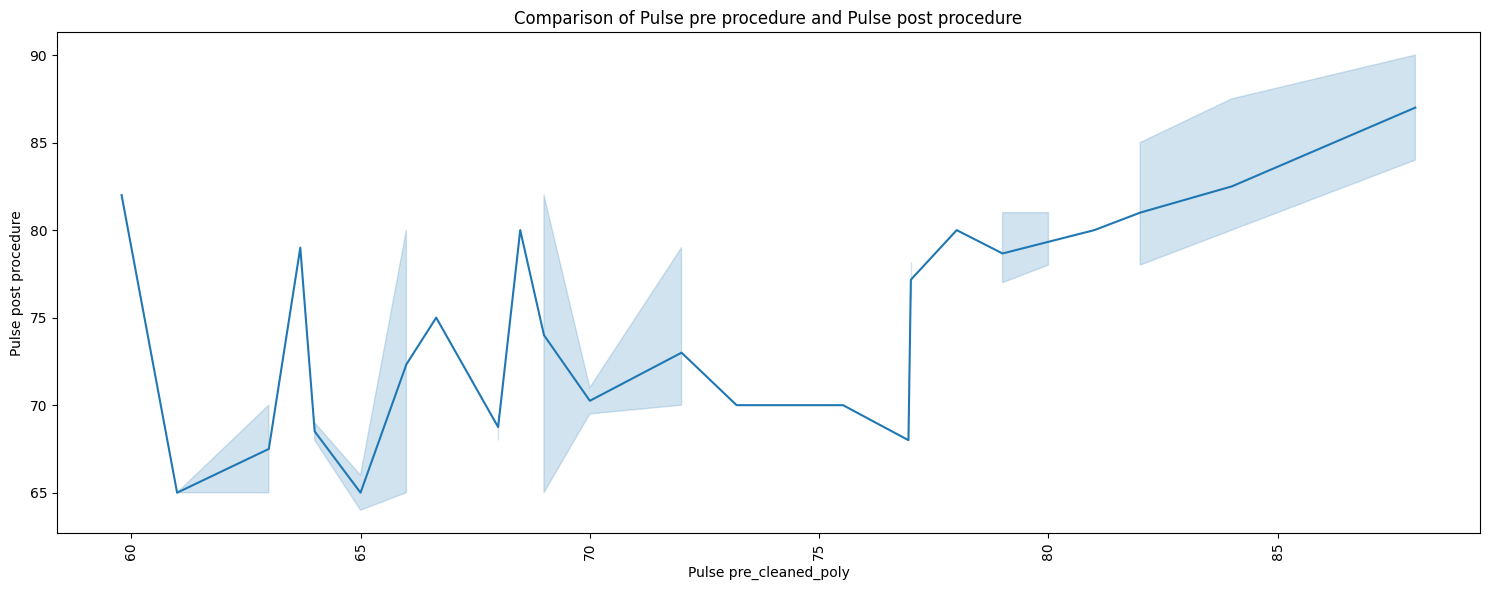

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_2, x='Pulse pre_cleaned_poly', y='Pulse post procedure')
#sns.barplot(data=df_2, x='Pulse pre_cleaned_poly' , y='Pulse post procedure')
plt.title('Comparison of Pulse pre procedure and Pulse post procedure')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# BarPlot: Comparison of Pre and post procedure  BP

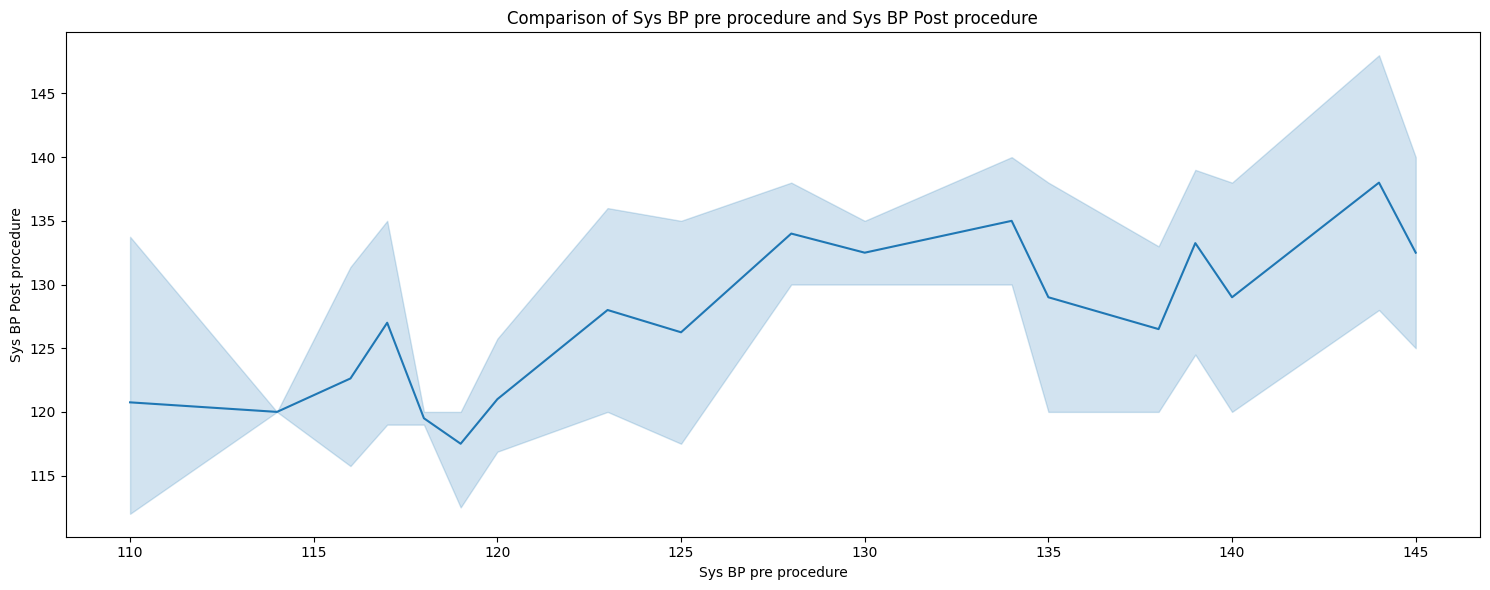

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_2, x='Sys BP pre procedure', y='Sys BP Post procedure')
#sns.barplot(data=df_2, x='Sys BP pre procedure', y='Sys BP Post procedure')
plt.title('Comparison of Sys BP pre procedure and Sys BP Post procedure')
plt.tight_layout()
plt.show()

# Countplot:Duration Vs Performed by

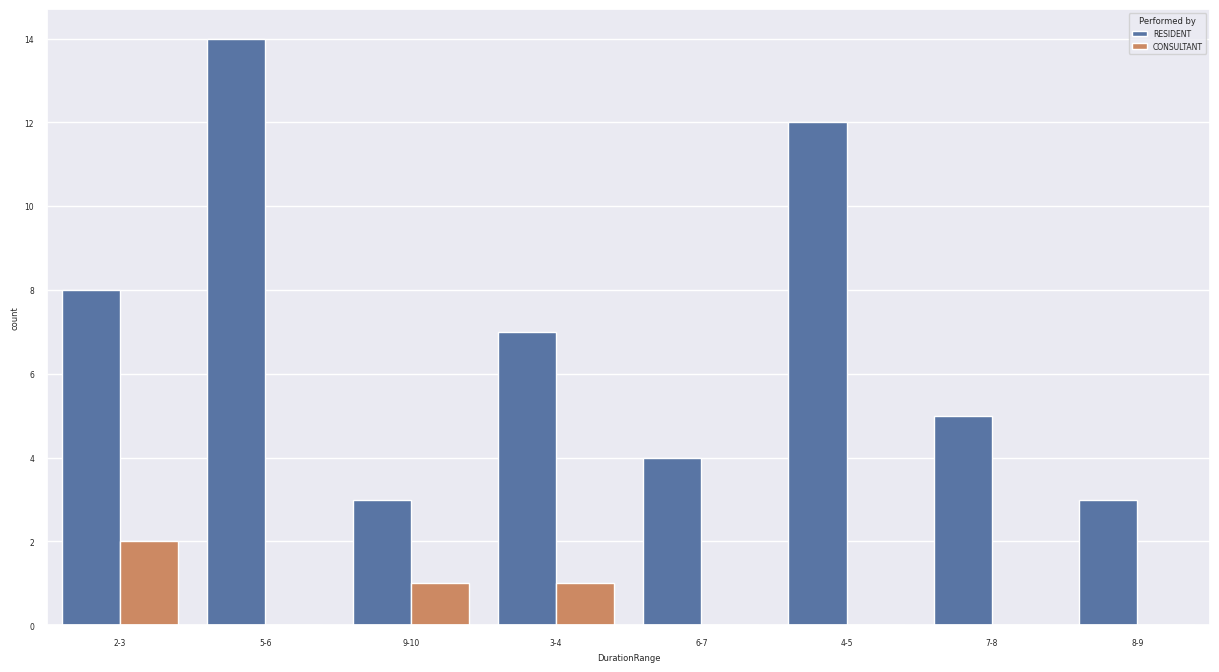

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_2, x='DurationRange', hue='Performed by')
plt.show()

# BarPlot:Comparing effect of pain on Group A Vs Group B

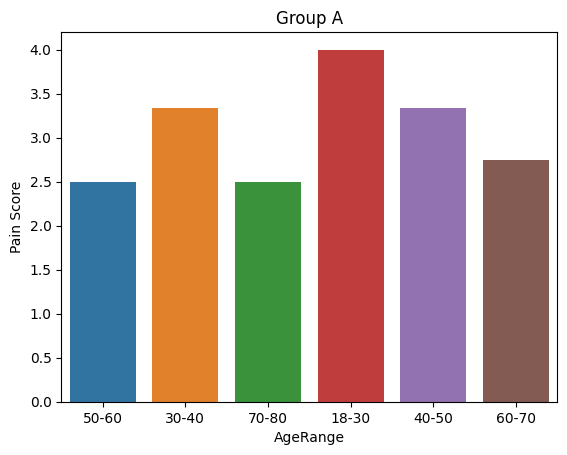

In [ ]:
subset1=df_2[df_2['Group'] == 'A']
sns.barplot(data=subset1, x='AgeRange', y='Pain Score',errorbar=None)
plt.title("Group A")
plt.show()

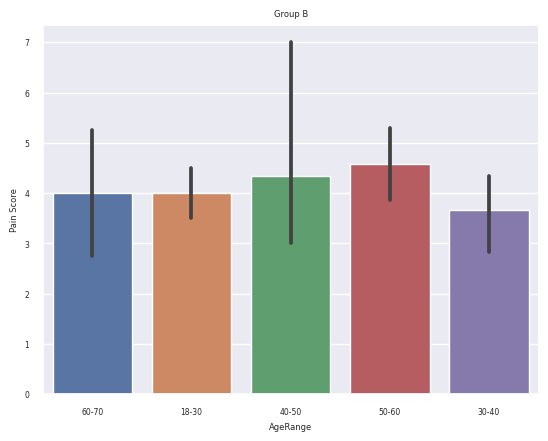

In [ ]:
subset2=df_2[df_2['Group'] == 'B']
sns.barplot(data=subset2, x='AgeRange', y='Pain Score')
plt.title("Group B")
plt.show()

# Barplot:Pulse and BP Difference w.r.t Duration

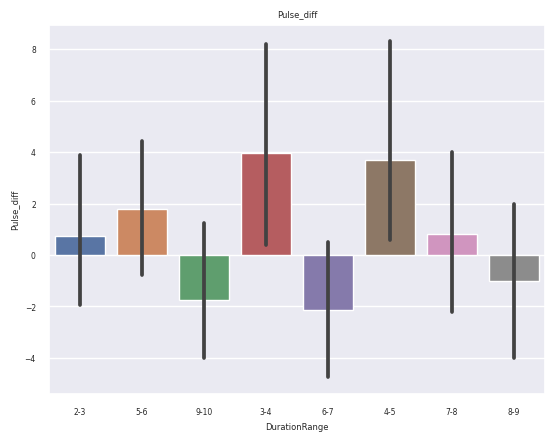

In [ ]:
df_2['Pulse_diff'] = df_2['Pulse post procedure'] - df_2['Pulse pre_cleaned_poly']
df_2['BP_diff'] = df_2['Sys BP pre procedure'] - df_2['Sys BP Post procedure']
sns.barplot(data=df_2, x='DurationRange', y='Pulse_diff')
plt.title("Pulse_diff")
plt.show()

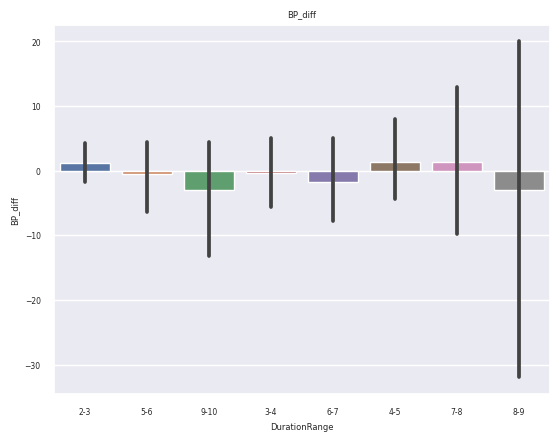

In [ ]:
sns.barplot(data=df_2, x='DurationRange', y='BP_diff')
plt.title("BP_diff")
plt.show()

# Pain Score effect due to Pulse and BP fluctuations

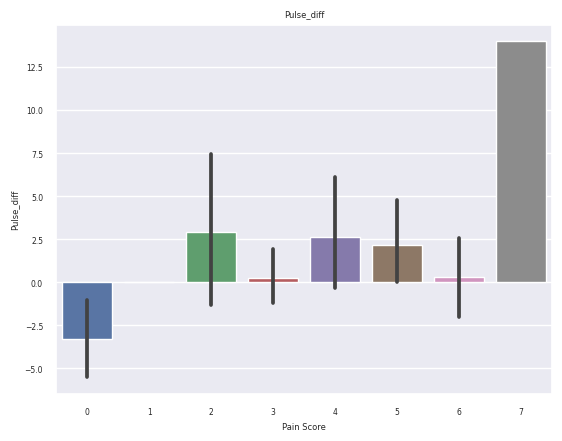

In [ ]:
sns.barplot(data=df_2, x='Pain Score', y='Pulse_diff')
plt.title("Pulse_diff")
plt.show()

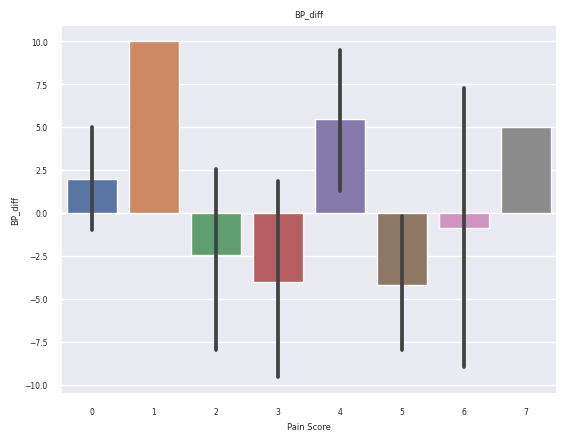

In [ ]:
sns.barplot(data=df_2, x='Pain Score', y='BP_diff')
plt.title("BP_diff")
plt.show()

# Multivariate Analysis: Pairplot

In [ ]:
df_2.columns

Index(['Group', 'Indication', 'Performed by', 'Pain Score', 'AgeRange',
       'DurationRange', 'Post_Pulse_Range', 'Pre_BP_Range', 'Post_BP_Range',
       'PrePulseRange'],
      dtype='object')

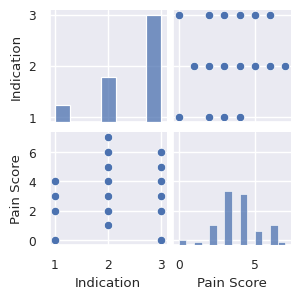

In [ ]:
#plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.pairplot(df_2,height=1.5)
plt.show()

# Business Questions Answered:




1)	How is the Duration of the procedure affecting the pulse rate and BP?
3 to 5 Duration range has more difference in pulse, while they are not much fluctuations in BP w.r.t Duration range

What does 3 different indication score signify?

None of the procedure required analgesia. Why?

2)	Is there same effect of the procedure on Group A and Group B keeping age into account?
In Group B, pain score was more on people between 50-60
In Group A, pain score was seen more on people between 18-30

3)	What is minimum and maximum duration of the procedure?
Duration ranges from 2 to 10

4)	Is there significant effect on pain score, when performed by resident vs consultant?
When Performed by Resident, the pain score is between 2 to 4. However, there are only 4 people that performed by “consultant”.

5)	What are the fluctuations of Pulse rate Pre and post procedure? It is highly correlated and not much fluctuations

6)	What is the effect on BP before and after procedure? Almost correlated with some fluctuations

7)	What is Pain score based on Pulse and BP fluctuations?
When Pulse fluctuation is more ,The pain score is highest (7).When BP difference is around 10 ,pain score is 1.However BP is not having much effect on pain score

8)	Is there any relationship between the age and indication score?
No, not much. Very few people took indication 1 with all ages between 20 to 80,
Indication 2 was taken by people between age 30-70
Indication 3 was taken by maximum people with age ranging from 20-80

9)	Is performance of resident/consultant affecting the duration of procedure?
The graph shows, when performed by consultant takes mostly 2-4 while there is exception between 9-10

10)	Is the indication score affecting the duration of procedure and also if it affects the pain score?
Indication 2,3 has duration between 2 to 6 for most. Indication 1 had duration ranging from 4 to 10 (which is on the higher side)
Indication 3 had maximum people with pain score 3 and 4 and for indication 2, pain score is mostly 2,3



# Encoding and handling imbalanced dataset

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [24]:
df_1.columns


Index(['Age', 'Group', 'Indication', 'Duration', 'Pulse post procedure',
       'Sys BP pre procedure', 'Sys BP Post procedure', 'Performed by',
       'Pain Score', 'Pulse pre_cleaned_poly'],
      dtype='object')

In [25]:
df_1 = pd.get_dummies(df_1,drop_first = True)
df_1.head()

,Age,Indication,Duration,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Pain Score,Pulse pre_cleaned_poly,Group_B,Performed by_RESIDENT
0,55,1,2.0,67,145,140,0,68.0,0,1
1,38,1,6.0,70,139,140,3,72.0,0,1
2,80,1,10.0,65,128,130,2,66.0,0,1
3,27,3,4.0,80,140,138,4,82.0,0,1
4,35,3,6.0,70,135,138,4,72.0,0,1


In [26]:
X= df_1.drop('Pain Score',axis=1)
Y= df_1['Pain Score']
Y.value_counts()

3    19
4    18
7     8
2     7
6     7
1     6
0     5
5     5
Name: Pain Score, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_res, y_res = smote.fit_resample(X, Y)

# Train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [29]:
X_test.count()

Age                       31
Indication                31
Duration                  31
Pulse post procedure      31
Sys BP pre procedure      31
Sys BP Post procedure     31
Pulse pre_cleaned_poly    31
Group_B                   31
Performed by_RESIDENT     31
dtype: int64

# Scaling

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling :SVC

In [95]:
# initialize the classifier
# automatically recognizes that the problem is the multiclass problem  and performs one-vs-one classification
# The idea is to split the problem into a series of binary classifiers:
#Classifier 1: class 0 against class 1
#Classifier 2: class 0 against class 2
#Classifier 3: class 1 against class 2
#Each classifier predicts a single class or a probability of a sample belonging to a certain class, and then we use the majority vote strategy to find the most appropriate class.
SVM_classifier=SVC(decision_function_shape='ovo')

In [96]:
SVM_classifier.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [97]:
y_predicted = SVM_classifier.predict(X_test)

# Visualize the prediction Vs Actual

In [168]:
y_test == y_predicted

68      True
147     True
96      True
82      True
135     True
139     True
26      True
12     False
18     False
15     False
134     True
128     True
108     True
19      True
69      True
9      False
65      True
30     False
126     True
115     True
113    False
31     False
56      True
67      True
60      True
138     True
36     False
86      True
112     True
42      True
85      True
Name: Pain Score, dtype: bool

In [169]:
(~(y_test == y_predicted)).sum()

8

Text(0.5, 1.0, 'Actual vs. Predicted Prices')

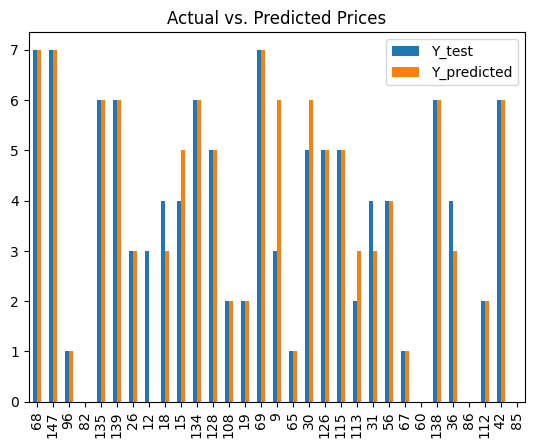

In [170]:
df_plot = pd.DataFrame({'Y_test': y_test, 'Y_predicted': y_predicted})
df_plot.plot(kind='bar')
plt.title('Actual vs. Predicted Prices')

# Score

In [98]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score(y_test,y_predicted)

0.7096774193548387

In [99]:
precision_score(y_test,y_predicted,average='micro')

0.7096774193548387

In [100]:
recall_score(y_test,y_predicted,average='micro')

0.7096774193548387

In [101]:
f1_score(y_test,y_predicted,average='micro')

0.7096774193548389

# Logistic regression

In [102]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Fit the model to your data
logistic_classifier.fit(X_train,y_train)
y_predicted2 = logistic_classifier.predict(X_test)

In [103]:
(y_test == y_predicted2).sum()

17

In [104]:
accuracy_score(y_test,y_predicted2)

0.5483870967741935

In [105]:
precision_score(y_test,y_predicted2,average='micro')

0.5483870967741935

In [106]:
recall_score(y_test,y_predicted2,average='micro')

0.5483870967741935

In [107]:
f1_score(y_test,y_predicted2,average='micro')

0.5483870967741935

# Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
y_predicted3 = dt.predict(X_test)

In [110]:
(y_test == y_predicted3).sum()

19

In [111]:
accuracy_score(y_test,y_predicted3)

0.6129032258064516

In [112]:
precision_score(y_test,y_predicted3,average='micro')

0.6129032258064516

In [113]:
recall_score(y_test,y_predicted3,average='micro')

0.6129032258064516

In [114]:
f1_score(y_test,y_predicted3,average='micro')

0.6129032258064516

# Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [124]:
y_predicted4 = rf.predict(X_test)

In [125]:
accuracy_score(y_test,y_predicted4)

0.8064516129032258

In [126]:
precision_score(y_test,y_predicted3,average='micro')

0.6129032258064516

In [127]:
recall_score(y_test,y_predicted3,average='micro')

0.6129032258064516

In [128]:
f1_score(y_test,y_predicted3,average='micro')

0.6129032258064516

# Final score

In [129]:
#Final - Accuracy Score
final_data = pd.DataFrame({'Models':['SVC','LR','DT','RF'],
                           'ACC':[accuracy_score(y_test,y_predicted),
                                  accuracy_score(y_test,y_predicted2),
                                  accuracy_score(y_test,y_predicted3),
                                  accuracy_score(y_test,y_predicted4)]})

In [130]:
final_data

,Models,ACC
0,SVC,0.709677
1,LR,0.548387
2,DT,0.612903
3,RF,0.806452
